앞에서 1차원이 아니라 2차원 이상의 방정식을 통헤서 예측한 회귀 모델을 다항회귀라고 한다.

다중회귀는 여러가지 특성을 사용하여 모델을 훈련시는 모델이라 할 수 있다.

 이전에는 length 길이 특성 하나만을 이용하여 모델을 학습한 반면에 이번에는 여러가지 특성ex) 길이, 무게, 색 을 통해서 종류? 다른 타겟울 알아 볼 수 있는 다중회귀에 대해서 알아본다.

특성이 두 개면 회귀 모델은 평면을 학습한다.

특성이 두 개면 3차원 공간에서 a*특성1 + b*특성2 + 절편 = 타깃 으로 나타낼 수 있고 특성이 하나 더 늘어나는 4차원은 그리거나 인간의 머리로는 생각할 수 없다. 

특성공학

기존의 특성을 사용하여 새로운 특성을 만들어내는 것

EX) 농어의 길이 X 농어의 높이 = 새로운 특성

판다스

농어의 특성이 늘어났기 때문에 여러 데이터를 불러오기 힘들다.

하나 하나 복사해야하지만 판다스를 이용하면 데이터를 쉽게 다운로드 받고 불러올 수 있다.

판다스는 핵심 데이터 구조로 데이터프레임을 사용하며 다차원의 배열을 표현 할 수 있느 것 뿐만 아니라 넘파이 배열로 쉽게 변환 할 수 있고 넘파이 보다 더 다양한 기능을 제공한다.

In [40]:
# 판다스 데이터프레임 -> 넘파이 배열로 변경 -> 학습
# 판다스 데이터프레임을 만들기 위해 csv 파일을 많이 사용한다.
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
print(df)

# 넘파일 배열로 변경
perch_full = df.to_numpy()
print(perch_full)

    length   height   width
0      8.4     2.11    1.41
1     13.7     3.53    2.00
2     15.0     3.82    2.43
3     16.2     4.59    2.63
4     17.4     4.59    2.94
5     18.0     5.22    3.32
6     18.7     5.20    3.12
7     19.0     5.64    3.05
8     19.6     5.14    3.04
9     20.0     5.08    2.77
10    21.0     5.69    3.56
11    21.0     5.92    3.31
12    21.0     5.69    3.67
13    21.3     6.38    3.53
14    22.0     6.11    3.41
15    22.0     5.64    3.52
16    22.0     6.11    3.52
17    22.0     5.88    3.52
18    22.0     5.52    4.00
19    22.5     5.86    3.62
20    22.5     6.79    3.62
21    22.7     5.95    3.63
22    23.0     5.22    3.63
23    23.5     6.28    3.72
24    24.0     7.29    3.72
25    24.0     6.38    3.82
26    24.6     6.73    4.17
27    25.0     6.44    3.68
28    25.6     6.56    4.24
29    26.5     7.17    4.14
30    27.3     8.32    5.14
31    27.5     7.17    4.34
32    27.5     7.05    4.34
33    27.5     7.28    4.57
34    28.0     7.82 

In [41]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [42]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [43]:
# 싸이킷런에서는 특성을 만들거나 특성을 전처리하기 위해 변환기(transformer)를 제공한다.
# LinearRegression 같은 사이킷런의 모델 클래스는 추정기(estimator)라고 한다.
from sklearn.preprocessing import PolynomialFeatures
# polynomialFeatures 클래스는 기본적으로 각 특성끼리 곱한 항, 특성을 제곱한 항을 추가한다. 또 1일 추가하는데 기본적인 bias 값으로서 불러온다.
# 1을 제거하고 특성을 생성하려면 include_bias=False로 설정해주면 된다.
# TEST
poly = PolynomialFeatures(degree= 5, include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[  2.   3.   4.   6.   9.   8.  12.  18.  27.  16.  24.  36.  54.  81.
   32.  48.  72. 108. 162. 243.]]


In [44]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [45]:
# 실제 데이터로 해보기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
# print(train_poly)

(42, 9)


In [46]:
poly.fit(test_input)
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 다중회귀 모델 학습
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [48]:
print(lr.score(test_poly, test_target))
# 농어의 길이만을 사용할 때 나타난 과소적합 문제는 나타나지 않았다.

0.9714559911594134


In [49]:
# 특성을 더 많이 추가 해보겠습니다.(최고항을 5제곱으로 설정해보겠습니다.)
# PolynomialFeatures의 degree 파라미터를 사용하면 특성으로 나타낼 최고항을 설정할 수 있습니다.
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
poly_train = poly.transform(train_input)
poly.fit(test_input)
poly_test = poly.transform(test_input)
print(poly_train.shape)
print(poly_test.shape)

(42, 55)
(14, 55)


In [50]:
lr.fit(poly_train, train_target)
print(lr.score(poly_train, train_target))
print(lr.score(poly_test, test_target))

0.9999999999991097
-144.40579242684848


위 결과를 보면 train 점수에서는 훌륭한 점수가 나왔지만 test 점수에서는 형편없는 이상한 점수가 나왔습니다. 이는 과대적합이 일어난 상황인데 너무 train 세트에만 복잡하게 학습되어 test 세트에서는 이상한 점수가 나온 상황이다.

위에서 shape을 통해서 보면 특성의 개수가 훈련세트의 개수인 42개보다 더 많은 것을 볼 수 있다.
이는 과대적합이 일어날 수 밖에 없는 상황이다.

In [51]:
# 위 상황을 해결하기 위해 특성의 개수를 줄여야한다.
# 특성의 개수를 줄여 과대적합을 해결하는 것을 **규제**라고 한다.
# 선형회귀 문제에서는 곱해지는 계수의 크기를 줄여주는 것으로 이해할 수 있다.

In [52]:
# 규제를 하기에 앞서 특성의 값이 정규화되지 않으면 곱해지는 계수의 값이 많이 차이가 날 수 있기 때문에 규제를 하기 전에 정규화를 해준다.
from sklearn.preprocessing import StandardScaler
# 변환기를 사용하여 정규화를 시킨다.
ss = StandardScaler()
ss.fit(poly_train)
train_scaled = ss.transform(poly_train)
test_scaled = ss.transform(poly_test)
print(train_scaled)
# 표준점수로 변환한 훈련, 테스트 세트가 준비되었다.

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]


In [53]:
# sklearn에서는 규제를 포함하고 있는 모델 **릿지** 와 **라쏘**를 제공한다.
# 릿지는 계수의 제곱을 기준으로 규제를 적용하고 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.
# 라쏘 모델은 계수의 크기를 아예 0으로 만들 수 있으며 릿지 규제 모델을 더 선호한다고 한다.
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


In [54]:
# alpha 값을 조정하여 
ridge.predict([train_scaled[0]])

array([89.54825138])

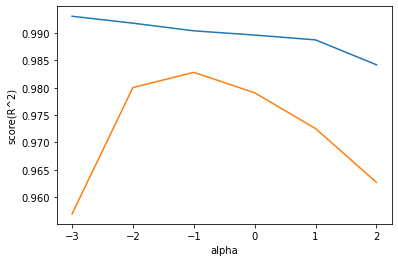

In [55]:
import matplotlib.pyplot as plt
train_score_list = []
test_score_list = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for i in alpha_list:
  ridge = Ridge(alpha=i)
  ridge.fit(train_scaled, train_target)
  train_score_list.append(ridge.score(train_scaled, train_target))
  test_score_list.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score_list)
plt.plot(np.log10(alpha_list), test_score_list)
plt.xlabel('alpha')
plt.ylabel('score(R^2)')
plt.show()